<a href="https://colab.research.google.com/github/DataNerd231/Python_Tutorials/blob/master/Pima_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

Performing EDA for better understanding of the data set and also using Decision tree Classifier to predict the diabetes class

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
import warnings 
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.feature_selection import chi2
warnings.filterwarnings('ignore')
sns.set(style="white")


In [4]:
# renaming the column names 
col_names=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# reading of the file
df = pd.read_csv("diabetes.csv", header = None, names = col_names)
df = df.loc[1:]

In [5]:
df.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape 

(768, 9)

Determing Missing Values 


In [7]:
pd.isnull(df).sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [8]:
df.dtypes

pregnant    object
glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object

**Looking at target variable and find how many patients fall into the class category **

In [9]:
df['label'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: label, dtype: float64

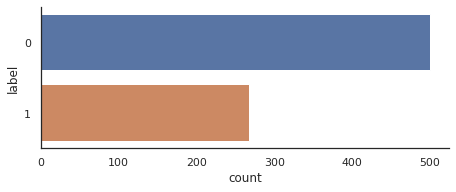

In [10]:
# Using catplot to visualize the category classification
ax = sns.catplot(y="label", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

In [11]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768,768,768,768,768,768,768,768,768
unique,17,136,47,51,186,248,517,52,2
top,1,100,70,0,0,32,0.258,22,0
freq,135,17,57,227,374,13,6,72,500


**Numeric Features**



In [13]:
cols = df.columns

numeric_cols = df[cols].apply(pd.to_numeric, errors='coerce')

numeric_cols.dtypes

numeric_cols.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Univariate Analysis to understand each variables better 

In [14]:
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


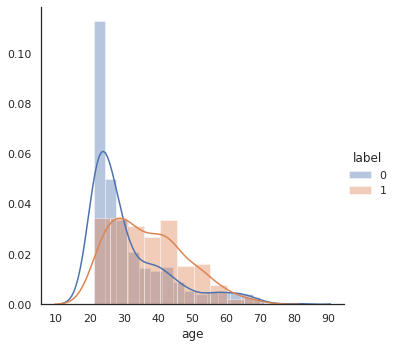

In [15]:
#Distribution plot using sns -for Age 
sns.FacetGrid(numeric_cols, hue='label', size=5).map(sns.distplot,"age").add_legend()

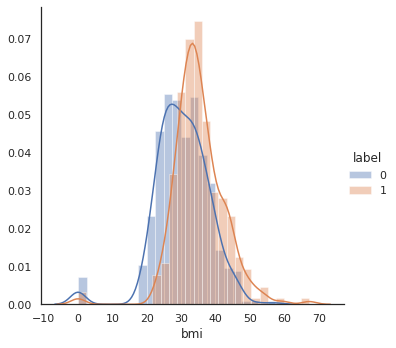

In [16]:
#Distibution plot using sns for bmi
sns.FacetGrid(numeric_cols, hue='label', size=5).map(sns.distplot,"bmi").add_legend()

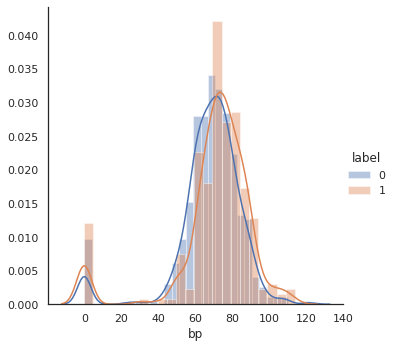

In [17]:
#Distibution plot using sns for bp
sns.FacetGrid(numeric_cols, hue='label', size=5).map(sns.distplot,"bp").add_legend()

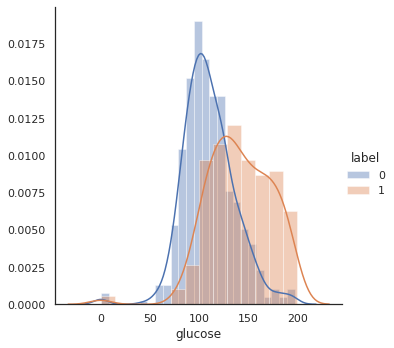

In [18]:
#Distibution plot using sns for glucose
sns.FacetGrid(numeric_cols, hue='label', size=5).map(sns.distplot,"glucose").add_legend()

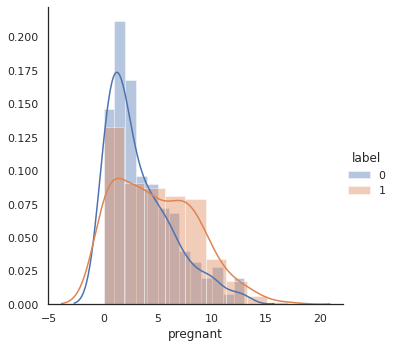

In [19]:
#Distibution plot using sns for pregnancies 
sns.FacetGrid(numeric_cols, hue='label', size=5).map(sns.distplot,"pregnant").add_legend()

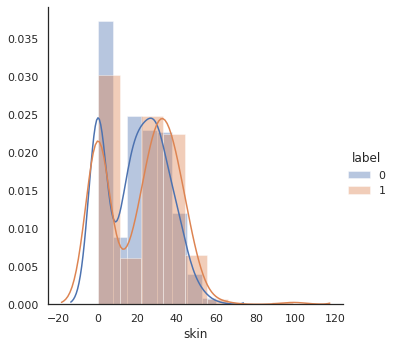

In [20]:
#Distibution plot using sns for skin thickness 
sns.FacetGrid(numeric_cols, hue='label', size=5).map(sns.distplot,"skin").add_legend()

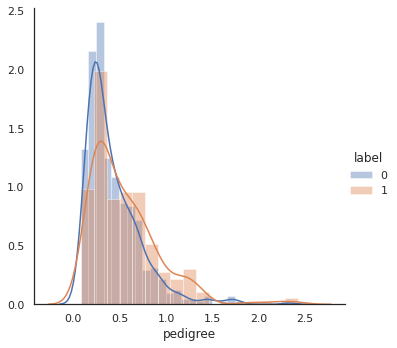

In [21]:
#Distibution plot using sns for  diabetes pedigree
sns.FacetGrid(numeric_cols, hue='label', size=5).map(sns.distplot,"pedigree").add_legend()

**Bivariate Analysis : Relationship between 2 variables **


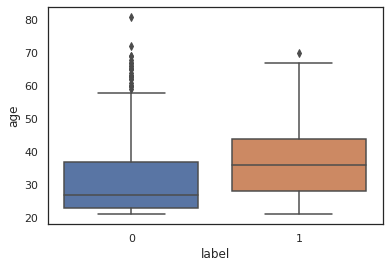

In [22]:
#Box plot for  variable age in relation to diabetes class variable 
sns.boxplot(x="label", y="age", data = numeric_cols)

In [ ]:
#Box plot for  variable bmi in relation to diabetes class variable 
sns.boxplot(x="label", y="bmi", data = numeric_cols)

Multivariate Analysis using pair plot and correlation 

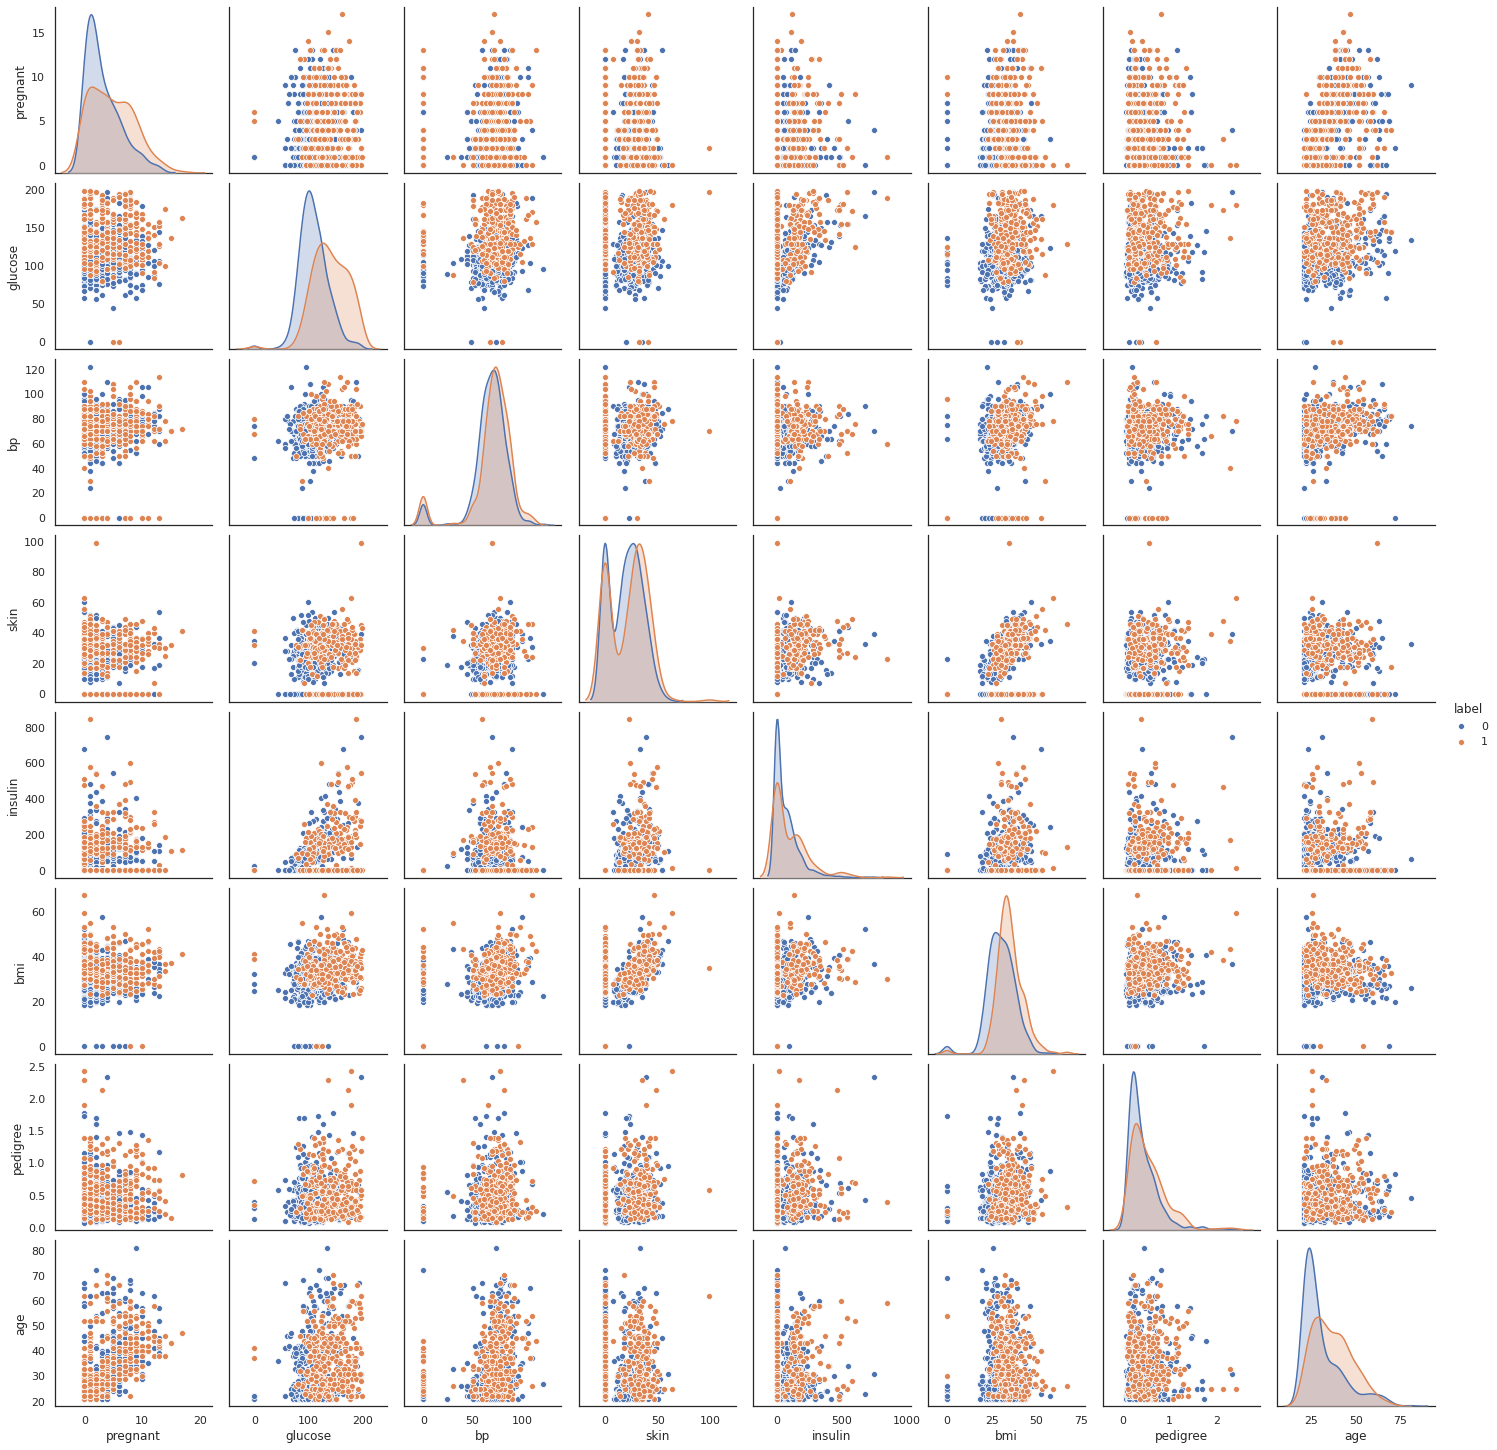

In [23]:
sns.pairplot(numeric_cols, hue="label")

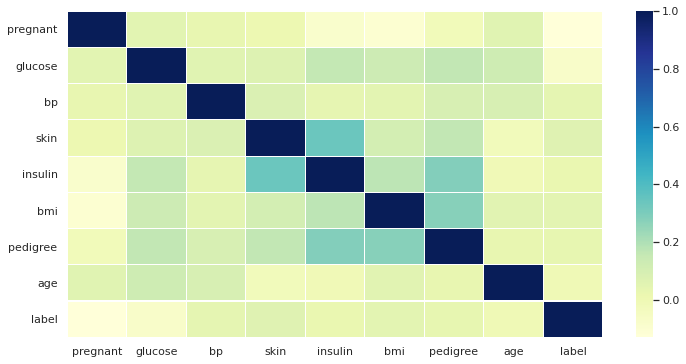

In [24]:
#Correlation heat map 
plt.figure(figsize=(12,6))
corr=numeric_cols.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                 linewidths=.2, cmap="YlGnBu")

Using Decision Trees to predict and classify the diabetes Class 


**Baseline Columns**

In [25]:
baseline_cols = ["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age"]
df_baseline = df[baseline_cols]
y_all=numeric_cols.label

In [31]:
#Splitting the data into train and validation set 
xtrain, xtest, ytrain, ytest = train_test_split(df_baseline, y_all, test_size=1/4, random_state=42, stratify = y_all)

In [32]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)


In [33]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

**AUC ROC CURVE & CONFUSION MATRIX**

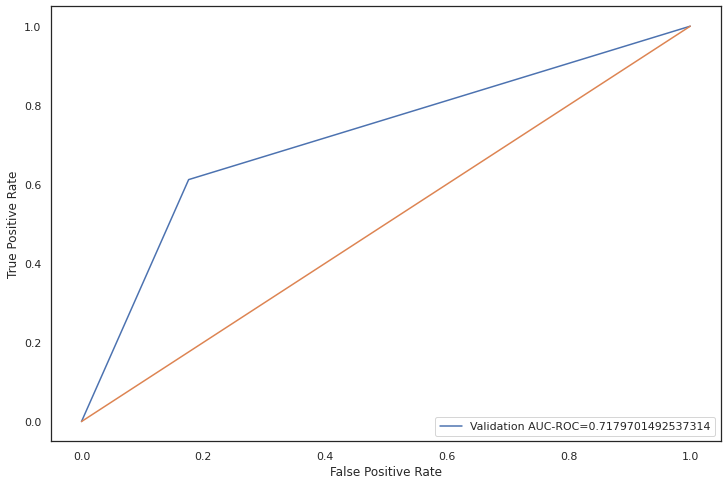

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(ytest, y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="Validation AUC-ROC="+str(auc))
x= np.linspace(0, 1, 1000)
y= np.linspace(0, 1, 1000)
plt.plot(x, y, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

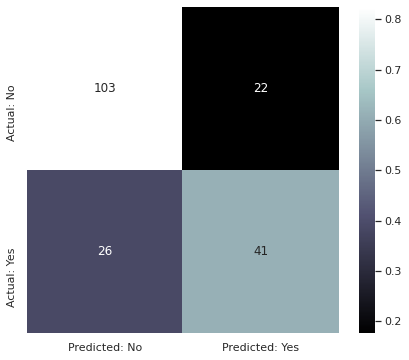

In [35]:
#Confusion Matrix
pred_val = model.predict(xtest)

label_preds = pred_val
cm = confusion_matrix(ytest, label_preds)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
  plt.figure(figsize=[7,6])
  norm_cm = cm
  if normalized:
    norm_cm = cm.astype('float') / cm.sum(axis=1)[: , np.newaxis]
    sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=["Predicted: No", "Predicted: Yes"], yticklabels=["Actual: No", "Actual: Yes"], cmap=cmap)

plot_confusion_matrix(cm, ["No", "Yes"])

In [36]:
#Recall Score 
recall_score(ytest, pred_val)

0.6119402985074627

In [37]:
#Accuracy Score
accuracy_score(ytest, pred_val)

0.75

**Visualization of the Decison Tree**

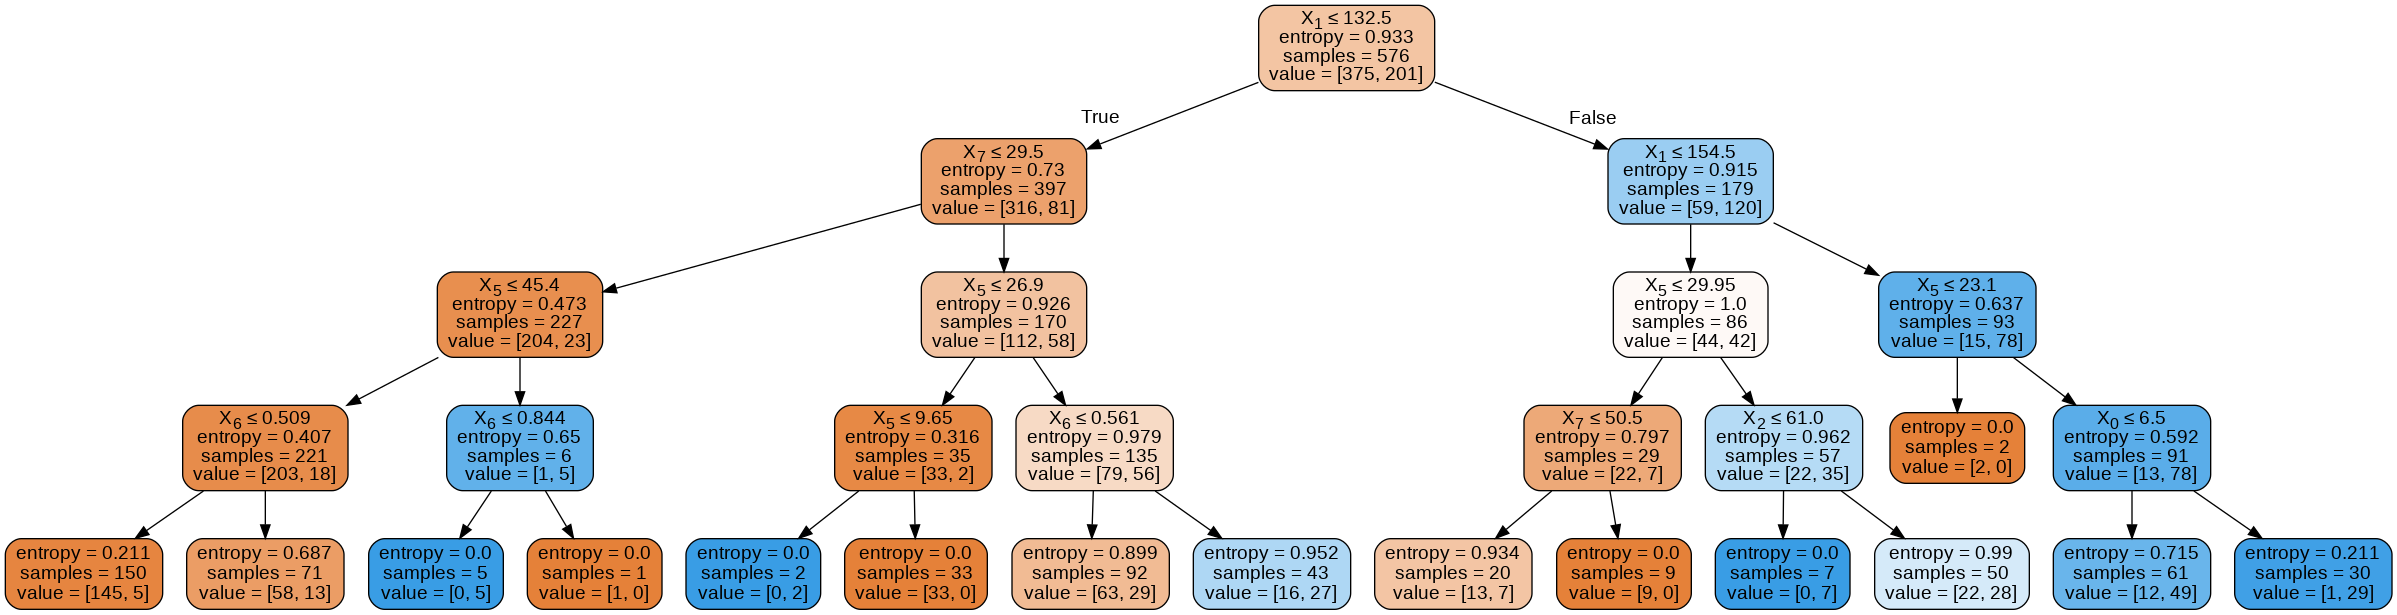

In [38]:
# Create DOT data
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
 # Show graph
Image(graph.create_png())

**Feature Selection**

In [39]:
df.iloc[0:5, :]

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [40]:
array = numeric_cols.values
X = array[:,0:8]
Y = array[:,8]

# Feature extraction
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.   0.  50.]
 [ 85.   0.  31.]
 [183.   0.  32.]
 [ 89.  94.  21.]
 [137. 168.  33.]]


**Recursive Feature Elimination with LogisticRegression**

In [41]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


Decision Tree with Top3 -Chisquare variable 

In [44]:
baseline_cols_2 = ["glucose","insulin","bmi","age"]
df_baseline2 = df[baseline_cols_2]
y2_all=numeric_cols.label

In [64]:
#Splitting the data into train and validation set 
x_train, x_test, y_train, y_test = train_test_split(df_baseline2, y2_all, test_size=1/4, random_state=42, stratify = y2_all)

In [65]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf.fit(x_train, y_train)
y_pred2 = clf.predict(x_test)

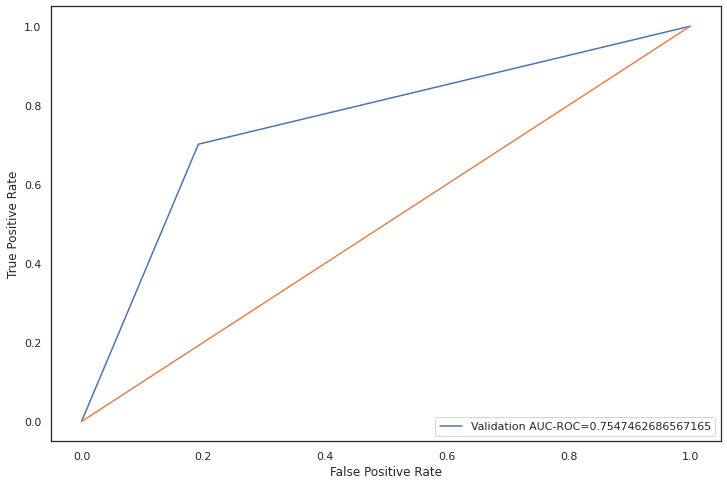

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred2)
auc = roc_auc_score(y_test, y_pred2)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="Validation AUC-ROC="+str(auc))
x= np.linspace(0, 1, 1000)
y= np.linspace(0, 1, 1000)
plt.plot(x, y, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

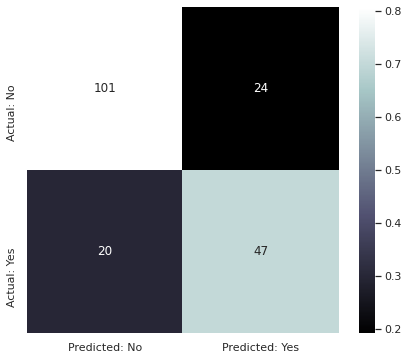

In [67]:
#Confusion Matrix
pred_val = clf.predict(x_test)

label_preds = pred_val
cm = confusion_matrix(y_test, label_preds)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
  plt.figure(figsize=[7,6])
  norm_cm = cm
  if normalized:
    norm_cm = cm.astype('float') / cm.sum(axis=1)[: , np.newaxis]
    sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=["Predicted: No", "Predicted: Yes"], yticklabels=["Actual: No", "Actual: Yes"], cmap=cmap)

plot_confusion_matrix(cm, ["No", "Yes"])

In [68]:
#Recall Score 
print(recall_score(y_test, pred_val))
#Accuracy Score
print(accuracy_score(y_test, pred_val))

0.7014925373134329
0.7708333333333334


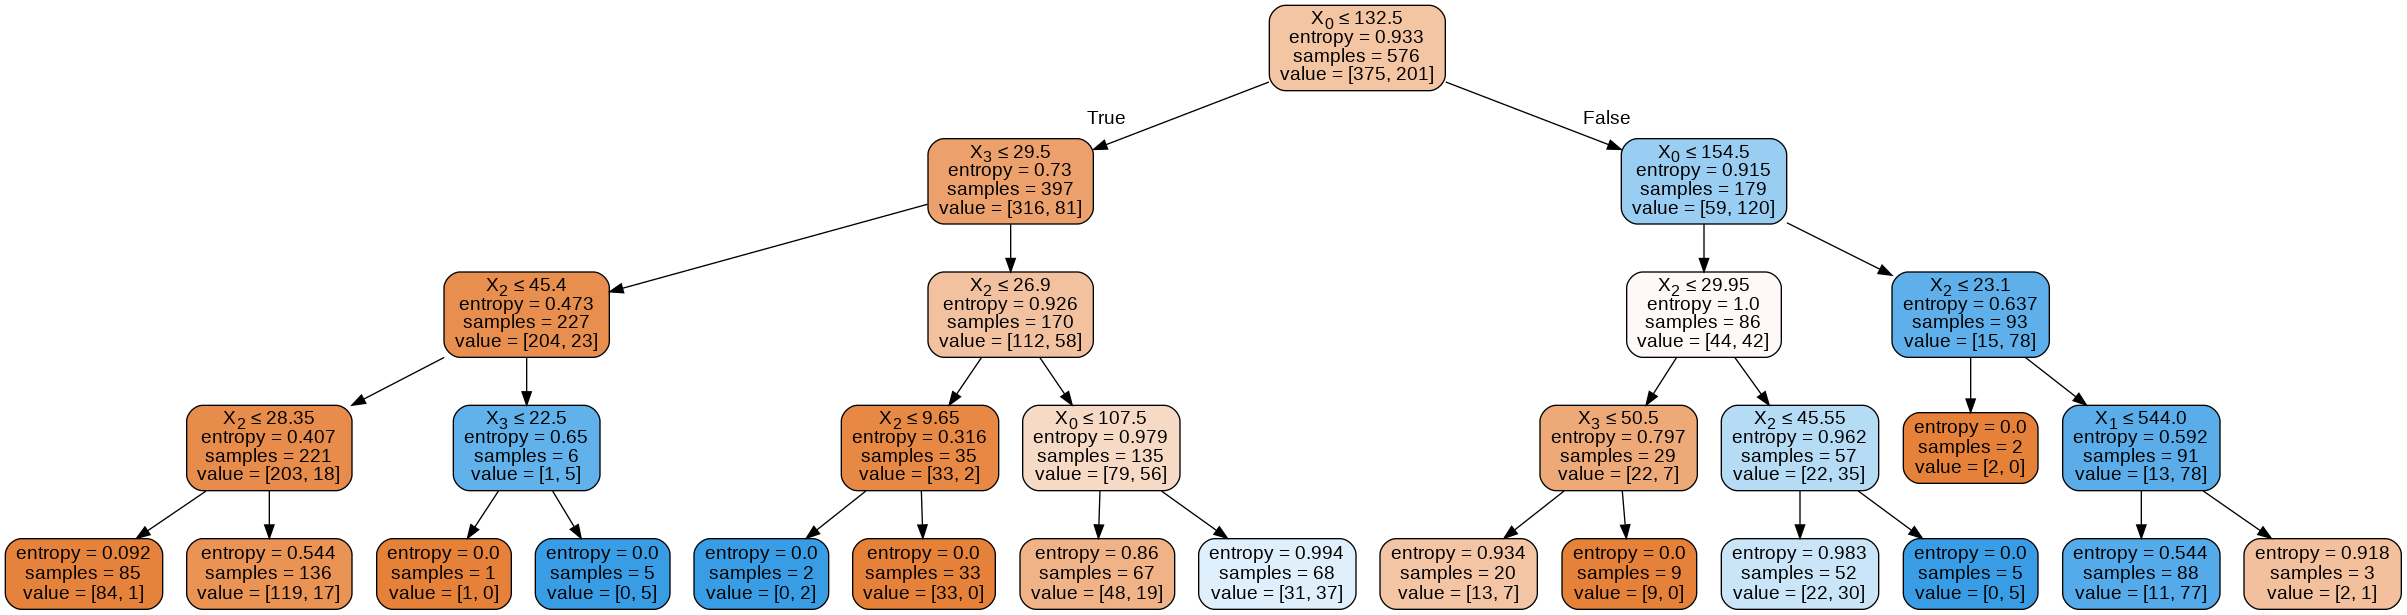

In [69]:
# Create DOT data
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
 # Show graph
Image(graph.create_png())

**Using Logistic Regression to classify the diabetes patient**

In [74]:
baseline_cols_3 =  ["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age"]
df_baseline3 = df[baseline_cols_3]
y3_all=numeric_cols.label

In [75]:
#Splitting the data into train and validation set 
x_train, x_test, y_train, y_test = train_test_split(df_baseline3, y3_all, test_size=1/4, random_state=42, stratify = y3_all)

**Feature Scaling**

In [80]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

In [85]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
# fit the model with data
logreg.fit(x_train,y_train)
y_pred3=logreg.predict(x_test)

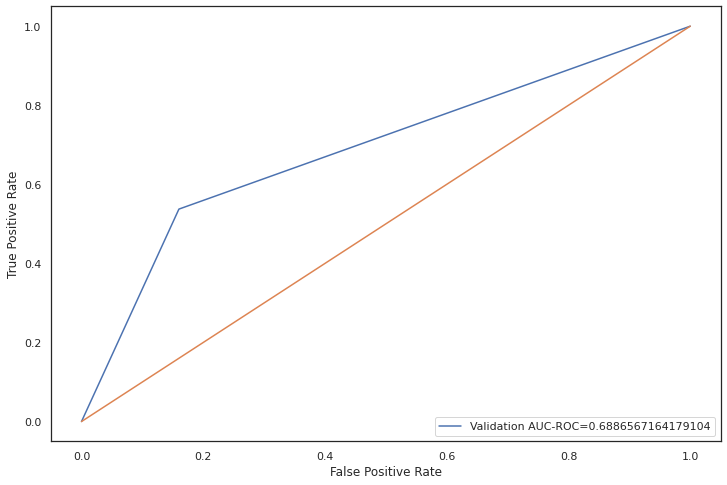

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred3)
auc = roc_auc_score(y_test, y_pred3)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="Validation AUC-ROC="+str(auc))
x= np.linspace(0, 1, 1000)
y= np.linspace(0, 1, 1000)
plt.plot(x, y, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

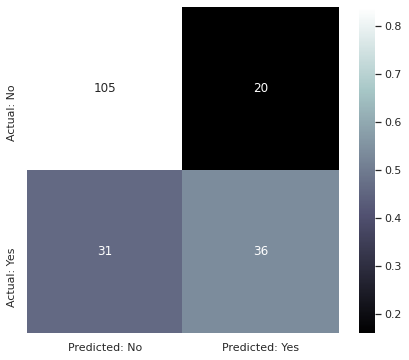

In [87]:
#Confusion Matrix
pred_val = logreg.predict(x_test)

label_preds = pred_val
cm = confusion_matrix(y_test, label_preds)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
  plt.figure(figsize=[7,6])
  norm_cm = cm
  if normalized:
    norm_cm = cm.astype('float') / cm.sum(axis=1)[: , np.newaxis]
    sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=["Predicted: No", "Predicted: Yes"], yticklabels=["Actual: No", "Actual: Yes"], cmap=cmap)

plot_confusion_matrix(cm, ["No", "Yes"])

In [88]:
#Recall Score 
print(recall_score(y_test, pred_val))
#Accuracy Score
print(accuracy_score(y_test, pred_val))

0.5373134328358209
0.734375
